In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.dropna(inplace=True)

### EDA

In [9]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


Text(0, 0.5, 'Price')

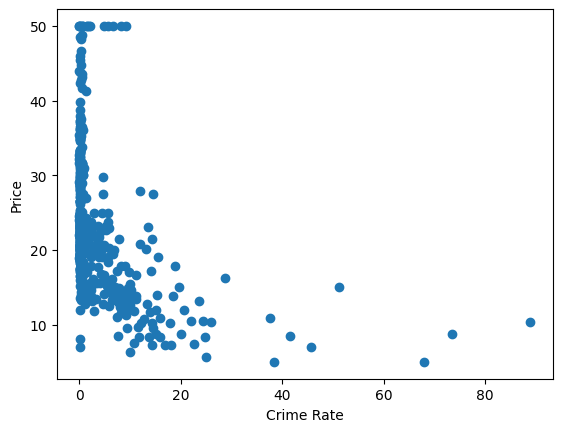

In [10]:
plt.scatter(df['crim'],df['medv'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

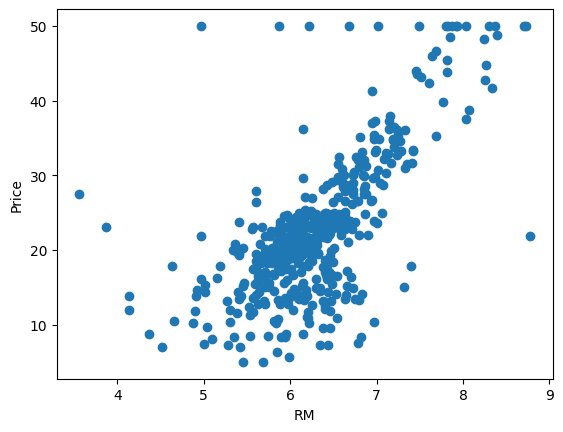

In [11]:
plt.scatter(df['rm'],df['medv'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='rm', ylabel='medv'>

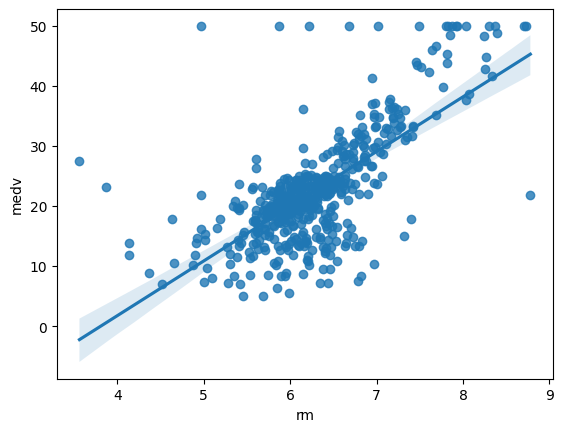

In [12]:
sns.regplot(x='rm',y='medv',data=df)

<Axes: xlabel='ptratio', ylabel='medv'>

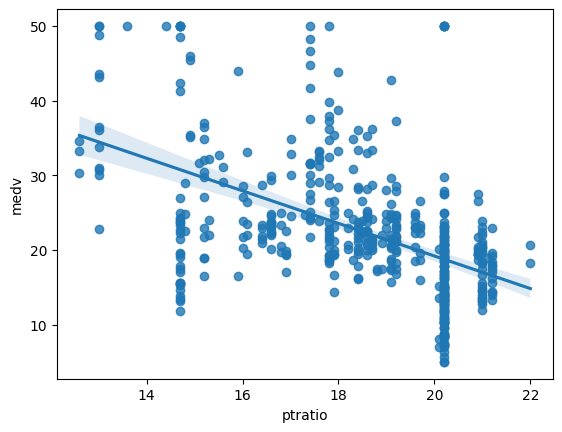

In [13]:
sns.regplot(x='ptratio',y='medv',data=df)

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [16]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [21]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [22]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
print(model.coef_)

[-0.81333048  1.25793481  0.55901585  0.62921378 -1.90632294  2.57817719
  0.56191215 -2.87590127  2.74653476 -2.09048251 -2.03201533  1.20544035
 -4.54581734]


In [25]:
print(model.intercept_)

22.840285714285717


In [26]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [27]:
model_pred=model.predict(X_test)

In [28]:
model_pred

array([11.18470187, 23.00563404, 15.50555989, 33.91377385, 22.85033375,
       11.52120718, 12.87909485, 19.68559436, 21.04526151, 11.33123451,
       18.86863905, 30.14960371, -1.11832542, 25.62332993,  2.86892345,
        8.03143995, 23.74581797, 18.48006615, 25.08802436, -6.69909852,
       13.05721404, 18.91286419, 27.07854376, 19.68268673, 22.34432239,
       16.60552708, 28.66835041, 26.17851266, 18.28698048, 20.9648065 ,
       20.99274995, 30.45869773, 17.88348023, 31.45467817, 31.04568544,
       21.85781507,  7.19466076, 23.35955087,  7.67299185, 25.28772941,
       13.06751099, 35.87850613, 14.55527766, 30.48366917, 12.54855213,
       28.33694316, 30.32808565, 19.98874661, 18.58460772, 13.49196425,
       23.92954047, 33.0591127 , 16.37371772, 11.0238909 , 34.65082608,
       33.84119359, 17.64417679, 18.519131  , 16.23822474, 27.42388838,
       20.31971468, 40.40623824, 20.22919151,  8.17914399, 25.84915232,
       27.38356934, 11.67432851,  7.40048488, 27.04285183, 16.64

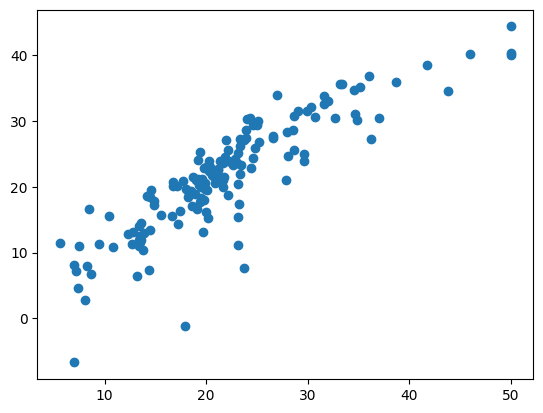

In [29]:
plt.scatter(y_test,model_pred)

In [30]:
residuals=y_test-model_pred

In [31]:
residuals

367    11.915298
76     -3.005634
380    -5.105560
160    -6.913774
108    -3.050334
         ...    
24     -0.109736
227    -1.048031
266     0.148491
435     1.444595
5       3.139275
Name: medv, Length: 151, dtype: float64

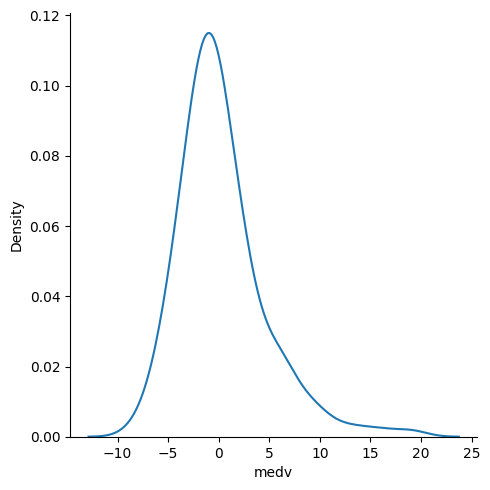

In [32]:
sns.displot(residuals,kind='kde')

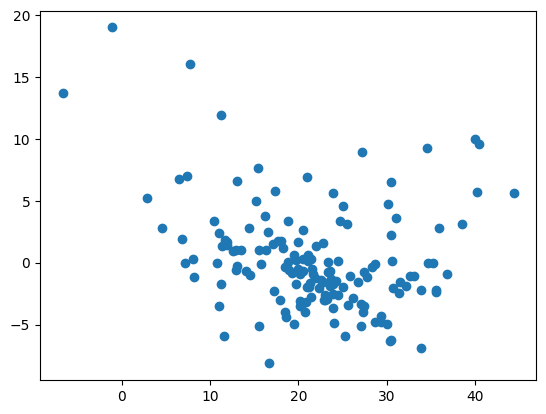

In [33]:
plt.scatter(model_pred,residuals)

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_test,model_pred))
print(mean_squared_error(y_test,model_pred))
print(np.sqrt(mean_squared_error(y_test,model_pred)))

3.0541387622304703
18.380869507282043
4.287291628438873


In [35]:
from sklearn.metrics import r2_score

score=r2_score(y_test,model_pred)
print(score)

0.7509342231409273


In [36]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7273002443148839

In [37]:
import pickle

pickle.dump(model,open('regmodel.pkl','wb'))

pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
rf_model=RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

In [41]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [42]:
y_pred_rf=rf_model.predict(X_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

Random Forest Performance:
MAE  : 2.29
RMSE : 3.09
R²   : 0.871


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 8, 12, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [45]:
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)


In [46]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 8, 12, 16],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='r2', verbose=2)

In [47]:
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [48]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_best = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("Tuned Random Forest Performance:")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

Tuned Random Forest Performance:
RMSE : 2.92
R²   : 0.884
